In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter, map_coordinates
import math

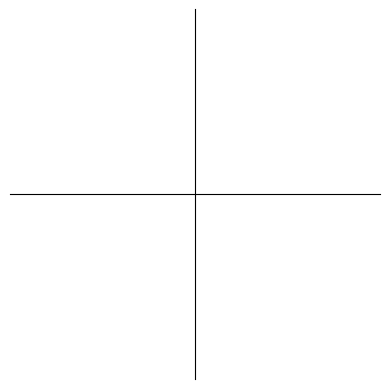

In [2]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

# Create a figure and an axes
fig = plt.figure()
ax = fig.add_subplot()
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Move the remaining spines to the zero of the other axis
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# Set the limits for the axes
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.set_aspect('equal')

# Create the function

# Show the plot
plt.show()

In [3]:
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

[ WARN:0@53.855] global loadsave.cpp:244 findDecoder imread_('data/original_function.png'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


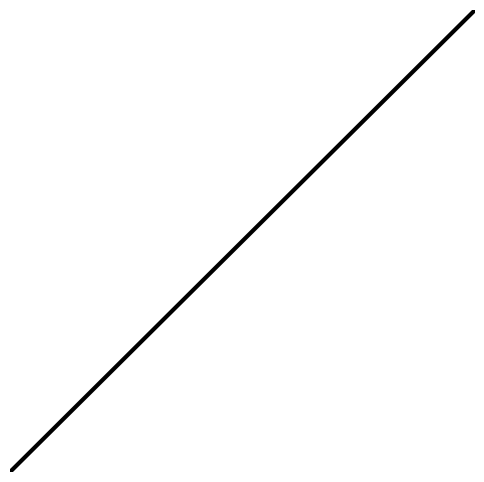

In [6]:
# Generate the original image of the function y = x
x = np.linspace(-10, 10, 400)
y = 1 * x 

plt.figure(figsize=(6,6))
plt.plot(x, y, linewidth=3, color = "black")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('off')  # Hide axes for clarity

# Save the original function image
plt.savefig('data/original_function.png', bbox_inches='tight', pad_inches=0, dpi=100)
plt.close()

# Display the original function image
original_img = cv2.imread('data/original_function.png')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [7]:

# Apply deformation to an image
def apply_elastic_transform(image, sigma, alpha=1000):
    random_state = np.random.RandomState(None)
    shape = image.shape
    print(shape)

    # Generate random displacement field. Apply random_state to the image shape to do a random displasement.
    # * 2 - 1 shapes the values between -1 and 1. 
    # Put a new random shape into a gaussian blur so the displacement would be smooth
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z+dz, (-1, 1))

    distored_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distored_image.reshape(image.shape)

# Apply augmentations
augmented_img = apply_elastic_transform(original_img.astype(np.float32), 10)

# Save and display the augmented function image
cv2.imwrite('data/augmented_function.png', augmented_img)
plt.imshow(cv2.cvtColor(augmented_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Augmented Function")
plt.axis('off')
plt.show()

AttributeError: 'NoneType' object has no attribute 'astype'

In [49]:
%%capture

def generate_linear_functions(a, b, sigma):
    x = np.linspace(-10, 10, 400)
    y = a*x + b

    plt.figure(figsize=(6,6))
    plt.plot(x, y, linewidth = 3, color = "black")
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.axis('off')  # Hide axes for clarity

    filename = f'data/linear/function_{a}x_{b}.png'

    # Save the original function image
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close()

    original_img = cv2.imread(filename)
    augmented_img = apply_elastic_transform(original_img.astype(np.float32), sigma)

    augumented_filename = f'data/linear/function_{a}x_{b}_{sigma}.png'
    cv2.imwrite(augumented_filename, augmented_img)


    
a_values = np.linspace(0.8, 1.2, 8)
b_values = np.linspace(-3, 3, 8)
sigma_values = np.linspace(7, 11, 8)

for a in a_values:
    for b in b_values:
        for sigma in sigma_values:
            # Call the generate_linear_functions function
            generate_linear_functions(a, b, sigma)

a_values_close = np.linspace(0.9, 1.1, 8)
b_values_close = np.linspace(-1.5, 1.5, 8)
sigma_values_close = [9, 10]

for a in a_values_close:
    for b in b_values_close:
        for sigma in sigma_values_close:
            # Call the generate_linear_functions function
            generate_linear_functions(a, b, sigma)


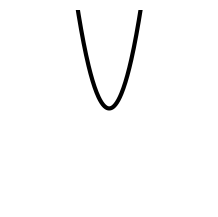

In [10]:
x = np.linspace(-10, 10, 400)
y = (x + 0)**2 + 0

plt.figure(figsize=(256*px,256*px))
plt.plot(x, y, linewidth = 3, color = "black")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.axis('off')  # Hide axes for clarity

plt.show()

In [51]:
%%capture


def generate_function_generic(a, b, sigma, equation, name):
    x = np.linspace(-10, 10, 400)
    y = eval(equation)

    plt.figure(figsize=(256*px,256*px))
    plt.plot(x, y, linewidth = 3, color = "black")
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.axis('off')  # Hide axes for clarity

    filename = f'data/{name}/function_{truncate_float(a, 4)}_{truncate_float(b, 4)}.png'
    # Save the original function image
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close()
    original_img = cv2.imread(filename)

    augmented_img = apply_elastic_transform(original_img.astype(np.float32), sigma)
    augumented_filename = f'data/{name}/function_{truncate_float(a, 4)}_{truncate_float(b, 4)}_{truncate_float(sigma, 4)}.png'
    cv2.imwrite(augumented_filename, augmented_img)

def iterate_function_generation(a_val, b_val, sigma_val,
                                a_val_c, b_val_c, sigma_val_c, 
                                equation, name):
    for a in a_val:
        for b in b_val:
            for sigma in sigma_val:
                generate_quadratic_functions(a, b, sigma, equation, name)
    for a in a_val_c:
        for b in b_val_c:
            for sigma in sigma_val_c:
                enerate_quadratic_functions(a, b, sigma, equation, name)



Functions Generation

In [ ]:
iterate_function_generation(np.linspace(-2, 2, 3), np.linspace(-2, 2, 3), np.linspace(7, 11, 3),
                            np.linspace(-1, 1, 3), np.linspace(-1, 1, 3), [9, 10],
                            "(x + a)**2 + b", "quadratic")